This is a notebook for the study of a simplified system. The first one is a simple system with symmetry that is similar to the one observed in the motivational model:

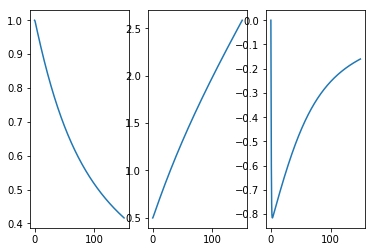

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 150000
h = 0.001
# Model parameters
epsilon = 0.01
# Maps
f1 = lambda x, y, z: epsilon*z
f2 = lambda x, y, z: epsilon*(1-z)
g = lambda x, y, z: -(z**3 + z*y + x)

# Numerical solution (euler)
x = np.zeros(T)
y = np.zeros(T)
z = np.zeros(T)
t = np.zeros(T)
# Initial conditions
x[0] = 1.0
y[0] = 0.5
z[0] = 0.0

for i in range(T-1):
    x[i+1] = x[i] + h*f1(x[i], y[i], z[i])
    y[i+1] = y[i] + h*f2(x[i], y[i], z[i])
    z[i+1] = z[i] + h*g(x[i], y[i], z[i])
    t[i+1] = t[i] + h
    
# Plotting
fig, ax = plt.subplots(1, 3)
ax[0].plot(t, x)
ax[1].plot(t, y)
ax[2].plot(t, z)
plt.show()

Critical manifold:

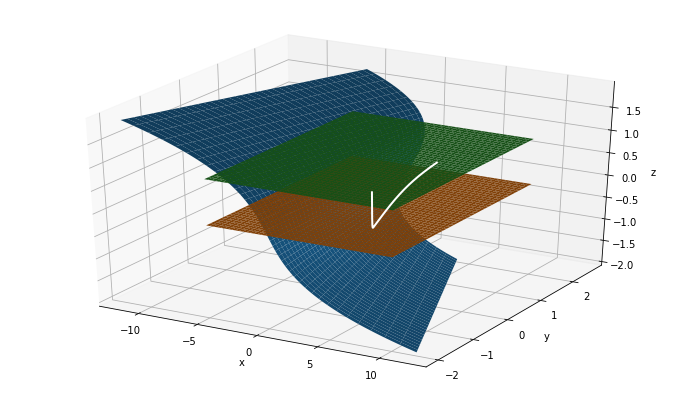

In [30]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"}, figsize = (12,7))
zz = np.arange(-2, 2, 0.025)
yy = np.arange(-2, 2, 0.025)
xx = np.arange(-5, 10, 0.025)
Z, Y = np.meshgrid(zz, yy)
XX, YY = np.meshgrid(xx, yy)
F = lambda z, y: -z**3 + y*z
X = F(Z, Y)

# Ploting critical surface
surf = ax.plot_surface(X, Y, Z)
# Plotting nullclines
ax.plot_surface(XX, YY, 0*XX)
ax.plot_surface(XX, YY, 1 +0*XX)

ax.plot3D(x, y, z, color = (1,1,1), linewidth = 2.0)

# plt.plot(x, y, 'b', linewidth = 2.0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

The second one, is just a one dimensional version of the full model:

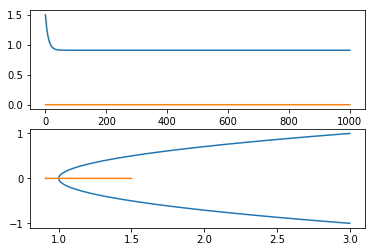

In [59]:
from scipy.integrate import odeint
epsilon = 0.01
a = 1.0
b = 10.0
sigma = 10.0
f = lambda u, rho: -a*u + b*(1 - u)*np.exp(-sigma*rho**2)
g = lambda u, rho: -4.0*rho**3 - 2.0*(1-u)*rho
rhof = lambda u: np.sqrt(0.5*(u - 1))
uf = lambda rho: 2.0*rho**2 + 1

def fast_scale(y, t):
    return np.array([epsilon*f(y[0], y[1]), 
                     g(y[0], y[1])])

t = np.linspace(0, 1000, 10000)
y0 = [1.5, 0.0]
y = odeint( fast_scale, y0, t )

fig, ax = plt.subplots(2, 1)
ax[0].plot(t, y[:,0])
ax[0].plot(t, y[:,1])

xx = np.linspace(-1, 1, 100)
# ax[1].plot(ux, rhof(ux))
ax[1].plot(uf(xx), xx)
ax[1].plot(y[:,0], y[:,1])
plt.show()